# __Streaming provider: Movie dataset__

## __Basics__

### __Import libraries and tools__

In [1]:
# import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import math
from math import sqrt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

---

### __Import dataset__

In [25]:
movies=pd.read_csv('../data/MoviesOnStreamingPlatforms_updated.csv')

---

## __Overview: Dataset__

Let's have a look on the dataset to see how many columns / features are included, how many missing values and more.

In [ ]:
movies.head()

In [ ]:
movies.tail()

In [ ]:
movies.shape

In [ ]:
movies.describe().transpose()

There are 9,515 entries in the dataset. 
* 50% of the movies were released after 2015.
* The oldest movie in the dataset is from 1914.
* The values in the 4 streaming provider Netflix, Hulu, Prime Video and Disney+ are 1 and 0 for True (1) and False (0), so originally bool.
* The columns "Unnamed:0" and "Type" I will drop because they won't add any value.
* The column "Runtime" includes film lengths of 1 min up to 566 min (around 9.5 hours).
* Most of the movies have a runtime of over 1.5 hour.

---

#### __Check for the data types and missing values__

In [ ]:
movies.info()

As I have seen here, there are missing values in 8 of the 17 columns. 

Most of them are missing in the age and directors columns.

In [ ]:
movies.isna().sum()

---

#### __Overview: values in the columns__

To understand the data better I check for unique values in the columns.

In [ ]:
movies['Age'].unique()

In [ ]:
movies['Type'].unique()

In [ ]:
movies['Genres'].unique()

In [ ]:
movies['Genres'].sort_values(key=lambda x: x.str.len(), ascending=False)

In [ ]:
movies['Genres'].loc[8933:8935].head()

In [ ]:
movies.groupby('Genres').size().sort_values(ascending=True)

In [ ]:
movies['Language'].unique()

In [ ]:
movies['Country'].unique()

---

#### __Drop columns: "Unnamed: 0" and "Type"__

In [26]:
movies = movies.drop(['Unnamed: 0', 'Type'], axis = 1)

In [27]:
movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


---
---

## __Delete, split and create new columns__

In [5]:
movies.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')

---

### __Language: split and create new columns__

In [28]:
# dropping null value columns to avoid errors
movies['Language'].dropna(inplace = True)

In [7]:
# new data frame with split value columns
new = movies["Language"].str.split(",", n = 7, expand = True)
  
# making separate columns from new data frame
movies["1st_Language"]= new[0]
movies["2nd_Language"]= new[1]
movies["3rd_Language"]= new[2]
movies["4th_Language"]= new[3]
movies["5th_Language"]= new[4]
movies["6th_Language"]= new[5]
movies["7th_Language"]= new[6]

# Dropping old Name columns
movies.drop(columns =["Language"], inplace = True)
  
# df display
movies

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,Genres,Country,Runtime,1st_Language,2nd_Language,3rd_Language,4th_Language,5th_Language,6th_Language,7th_Language
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,...,"Biography,Crime,Drama",United States,209.0,English,Italian,Latin,Spanish,German,None,None
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,...,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...",161.0,Hindi,English,None,None,None,None,None
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,...,"Documentary,Biography",United Kingdom,83.0,English,None,None,None,None,None,None
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,...,"Drama,Musical,Sport","India,United Kingdom",224.0,Hindi,English,None,None,None,None,None
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,...,"Action,Drama,History,Romance,War","United Kingdom,United States",52.0,English,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,NaN,NaN,14/100,0,0,0,1,...,"Crime,Reality-TV",United States,NaN,Greek,English,None,None,None,None,None
9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,NaN,13/100,0,0,0,1,...,Animation,United States,23.0,English,None,None,None,None,None,None
9512,9513,Ultimate Viking Sword,2019,NaN,NaN,13/100,0,0,0,1,...,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9513,9514,Hunt for the Abominable Snowman,2011,NaN,NaN,10/100,0,0,0,1,...,"Drama,History",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
movies['Language']=movies["Language"].apply(str)

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords = ["nan", "NaN", "nAN", "nAn", "Nan", "NAN", "none", "None"] + list(STOPWORDS)

In [32]:
movies['Language']

0       English,Italian,Latin,Spanish,German
1                              Hindi,English
2                                    English
3                              Hindi,English
4                                    English
                        ...                 
9510                           Greek,English
9511                                 English
9512                                     nan
9513                                     nan
9514                                 English
Name: Language, Length: 9515, dtype: object

In [11]:
movies['Netflix'].sum()

3695

In [12]:
movies['Disney+'].sum()

922

In [13]:
movies['Hulu'].sum()

1047

In [14]:
movies['Prime Video'].sum()

4113

In [10]:
movies_plot = movies.groupby(['Prime Video', 'Netflix', 'Hulu', 'Disney+']).size().reset_index()

In [26]:
movies_plot

,Prime Video,Netflix,Hulu,Disney+,0
0,0,0,0,1,900
1,0,0,1,0,911
2,0,0,1,1,5
3,0,1,0,0,3550
4,0,1,0,1,4
5,0,1,1,0,32
6,1,0,0,0,3901
7,1,0,0,1,11
8,1,0,1,0,92
9,1,1,0,0,101


---

### __Countries: split and create new columns__

In [7]:
# dropping null value columns to avoid errors
movies['Country'].dropna(inplace = True)

In [36]:
movies['Country']=movies["Country"].apply(str)

In [8]:
# new data frame with split value columns
new_c = movies["Country"].str.split(",", n = 7, expand = True)
  
# making separate columns from new data frame
movies["1st_Country"]= new_c[0]
movies["2nd_Country"]= new_c[1]
movies["3rd_Country"]= new_c[2]
movies["4th_Country"]= new_c[3]
movies["5th_Country"]= new_c[4]
movies["6th_Country"]= new_c[5]
movies["7th_Country"]= new_c[6]

# Dropping old Name columns
movies.drop(columns =["Country"], inplace = True)
  
# df display
movies

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,5th_Language,6th_Language,7th_Language,1st_Country,2nd_Country,3rd_Country,4th_Country,5th_Country,6th_Country,7th_Country
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,...,German,None,None,United States,None,None,None,None,None,None
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,...,None,None,None,India,United States,United Kingdom,Australia,Kenya,Namibia,None
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,...,None,None,None,United Kingdom,None,None,None,None,None,None
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,...,None,None,None,India,United Kingdom,None,None,None,None,None
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,...,None,None,None,United Kingdom,United States,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,NaN,NaN,14/100,0,0,0,1,...,None,None,None,United States,None,None,None,None,None,None
9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,NaN,13/100,0,0,0,1,...,None,None,None,United States,None,None,None,None,None,None
9512,9513,Ultimate Viking Sword,2019,NaN,NaN,13/100,0,0,0,1,...,NaN,NaN,NaN,United States,None,None,None,None,None,None
9513,9514,Hunt for the Abominable Snowman,2011,NaN,NaN,10/100,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movies.columns

In [ ]:
countries=movies.drop(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Runtime',
       '1st_Language', '2nd_Language', '3rd_Language', '4th_Language',
       '5th_Language', '6th_Language', '7th_Language', 'Genres'], axis=1)

In [ ]:
countries.head()

---

### __Genres: split and create new columns__

In [ ]:
# dropping null value columns to avoid errors
movies['Genres'].dropna(inplace = True)

In [ ]:
# new data frame with split value columns
new_g = movies["Genres"].str.split(",", n = 7, expand = True)
  
# making separate columns from new data frame
movies["1st_Genres"]= new_g[0]
movies["2nd_Genres"]= new_g[1]
movies["3rd_Genres"]= new_g[2]
movies["4th_Genres"]= new_g[3]
movies["5th_Genres"]= new_g[4]
movies["6th_Genres"]= new_g[5]
movies["7th_Genres"]= new_g[6]

# Dropping old Name columns
movies.drop(columns =["Genres"], inplace = True)
  
# df display
movies

In [ ]:
movies

---

### __Provider__

In [ ]:
provider=movies.drop(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes','Directors', 'Genres', 'Country',
       'Language', 'Runtime'], axis = 1)

In [ ]:
provider.head()

In [ ]:
# dropping null value columns to avoid errors
data.dropna(inplace = True)
   
# new data frame with split value columns
data["Team"]= data["Team"].str.split("t", n = 1, expand = True)
  
# df display
data

---

### __Wordclouds__

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS)
stopwords = ["nan", "NaN", "nAN", "nAn", "Nan", "NAN", "none", "None"] + list(STOPWORDS)

---

#### __Wordcloud for Country__

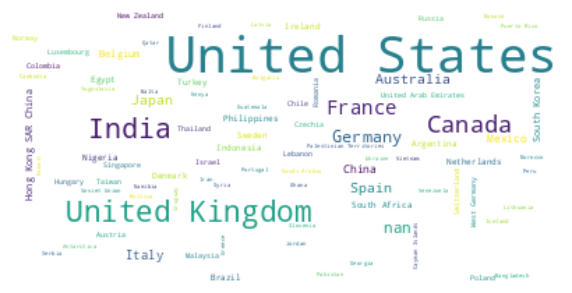

In [40]:
counts = dict()
def word_count(str:str, counts:dict) -> dict:
    words = str.split(',')

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

for items in movies['Country'].iteritems():
    word_count(items[1], counts)

def makeImage(text):
    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(text)
    # show
    plt.figure(figsize=(10,6)) 
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

makeImage(counts)

---

#### __Wordcloud for language__

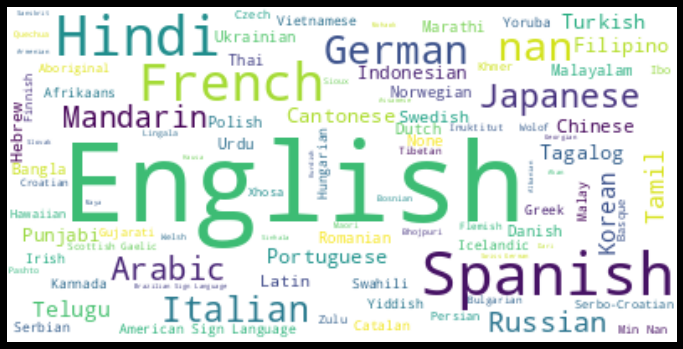

In [38]:
counts = dict()
def word_count(str:str, counts:dict) -> dict:
    words = str.split(',')

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

for items in movies['Language'].iteritems():
    word_count(items[1], counts)

def makeImage(text):
    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(text)
    # show
    plt.figure(figsize=(12,8), facecolor="black") 
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

makeImage(counts)

In [ ]:
text_language = " ".join(review for review in movies['Language'].astype(str))

In [ ]:
movies_country = movies['Language'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(movies_country)
# Generate a word cloud image
wordcloud_searchpath = WordCloud(stopwords=stopwords, background_color="white").generate(text_language)

plt.figure(figsize=(12,8), facecolor="black") 
plt.imshow(wc)
plt.axis('off')
plt.show()

---

#### __Wordcloud for Genres__

In [ ]:
text_genres = " ".join(review for review in movies['Genres'].astype(str))

In [ ]:
movies_genres = movies['Genres'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(movies_genres)
# Generate a word cloud image
wordcloud_searchpath = WordCloud(stopwords=stopwords, background_color="white").generate(text_genres)

plt.figure(figsize=(12,8), facecolor="black") 
plt.imshow(wc)
plt.axis('off')
plt.show()

---

#### __Wordcloud for Director__

In [ ]:
text_directors = " ".join(review for review in movies['Directors'].astype(str))

In [ ]:
movies_directors = movies['Directors'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(movies_directors)
# Generate a word cloud image
wordcloud_searchpath = WordCloud(stopwords=stopwords, background_color="white").generate(text_directors)

plt.figure(figsize=(12,8), facecolor="black") 
plt.imshow(wc)
plt.axis('off')
plt.show()